#### 6. 로지스틱 회귀분석(Logistic Regression)
- 회귀분석 문제와 분류문제 모두 사용가능
- 로지스틱 회귀분석 모형
    - 종속변수 : 이항분포를 따르고 모수$\mu$는 독립변수 $x$에 의존한다고 가정
        - $p(y|x) = Bin(y; \mu(x), N)$
    - $y$의 값이 특정한 구간내의 값( 0∼N )만 가질 수 있기 때문에 종속변수가 이러한 특성을 가진 경우 회귀분석 방법으로 사용 가능
    - 이항 분포의 특별한 경우( N=1 )로  $y$ 가 베르누이 확률분포인 경우
        - $p(y|x) = Bern(y; \mu(x))$
        - y는 0 또는 1인 분류 예측 문제를 풀때 사용

In [1]:
%matplotlib inline

In [2]:
from matplotlib import rc

plt.style.use('seaborn')
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

#####  시그모이드 함수

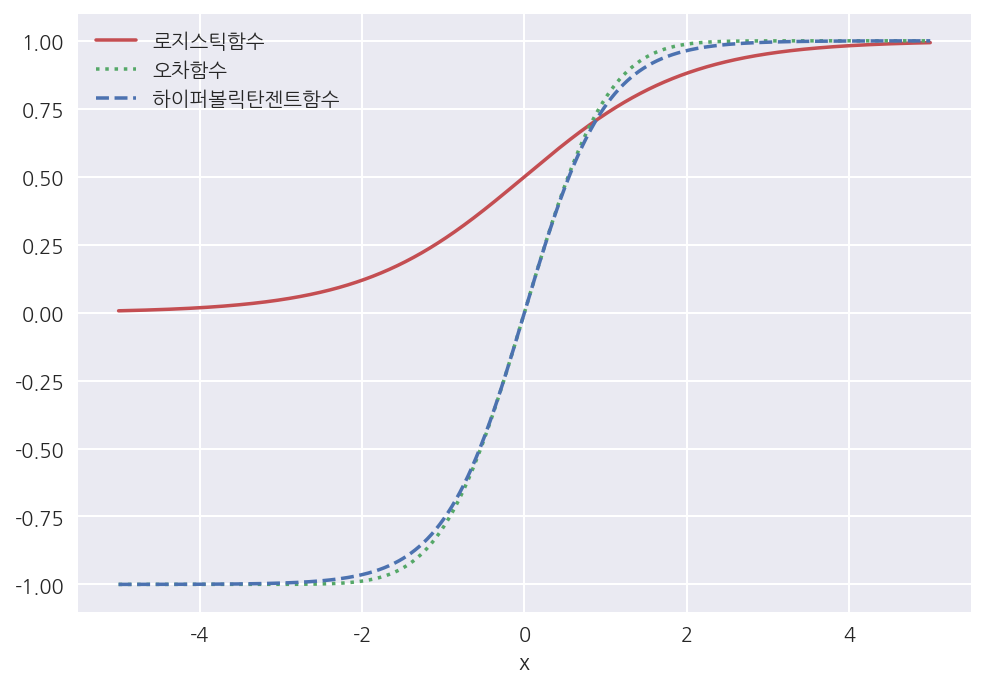

In [3]:
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="로지스틱함수")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="오차함수")
plt.plot(xx, np.tanh(xx), 'b--', label="하이퍼볼릭탄젠트함수")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.show()

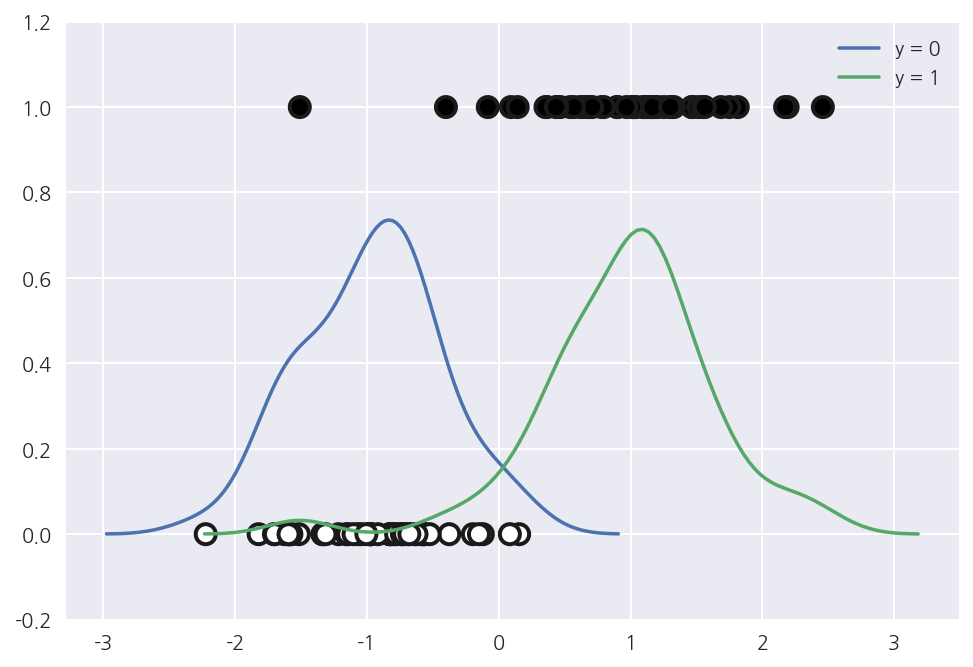

In [4]:
# 1차원 독립변수를 가지는 분류문제
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)

plt.scatter(X0, y, c=y, s=100, edgecolor="k", linewidth=2)
sns.distplot(X0[y == 0, :], label="y = 0", hist=False)
sns.distplot(X0[y == 1, :], label="y = 1", hist=False)
plt.ylim(-0.2, 1.2)
plt.show()

##### 로지스틱 분석
- logistics -> LL값을 최대화 하는 값 찾는것
- Logit 클래스 -> 베르누이 분포를 따르는 로지스틱 회귀 모형
    - OLS 클래스와 사용법은 동일
    - 독립변수와 종속변수 데이터를 넣어 모형을 만들고 fit으로 학습
    - disp = 0 : 최적화 과정에서 문자열 메세지가 나타나지 않게 함

In [5]:
X = sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 May 2020   Pseudo R-squ.:                  0.7679
Time:                        11:25:31   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006
